# Ejercicio practico de regresion lineal simple.

En esta practica vamos a intentar conocer los valores de **intercepto** y **pendiente**.

Vamos a buscar b0 y b1 para la regresion lineal simple

y = b0 +b1*x


In [ ]:
import numpy as np

**Creamos** **un** **set** **de** **datos**


Para esto proponemos conjunto de datos que se relacionen: y = 1-x + 10

In [75]:
X = np.arange(1, 300, 1) # arange (start, stop, step)
print(f"X 5 sample: {X[:5]}, x shape: {X.shape}, x type: {type(X)}")

X 5 sample: [1 2 3 4 5], x shape: (299,), x type: <class 'numpy.ndarray'>


In [84]:
# Creamos una variable 'y' relacionada con 'x'
y = np.arange(11, 310, 1)
print(f"Y 5 sample: {Y[:5]}, y shape: {Y.shape}, y type: {type(Y)}")

Y 5 sample: [11 12 13 14 15], y shape: (299,), y type: <class 'numpy.ndarray'>


In [77]:
import matplotlib.pyplot as plt


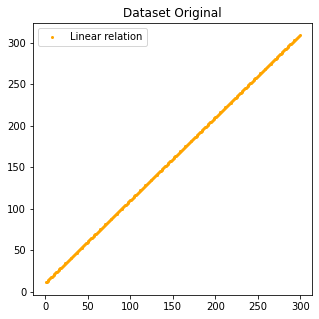

In [85]:
plt.figure(figsize=(5,5))
plt.scatter(X,y,c='orange', s=4, label='Linear relation')
plt.legend()
plt.title('Dataset Original');

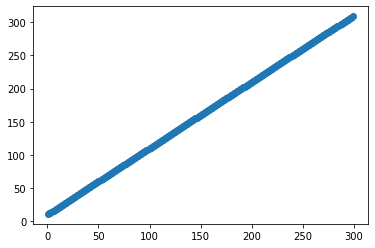

In [86]:
plt.scatter(X, y)

## Separar los datos

Separar los datos para **entrenar** un modelo, por lo general se utiliza el 80% del total de dataset.

Para **validar** el modelo durante el entrenamiento se usa el 10% del total restante.

Para **testear** el modelo durante el entrenamiento usamos el otro 10% restante.

In [80]:
split = int(len(X)*0.8)
print(f"Los datos para entrenar el modelo son: {split}")

test = int((len(X)-split))
print(f"20% de los datos finales: {test}")

mid_test = test//2
print(f"mid test: {mid_test}")

Los datos para entrenar el modelo son: 239
20% de los datos finales: 60
mid test: 30


In [81]:
X_train = X[:split] # se toma en cuenta todo hasta el valor de split (239)
X_val = X[split:split+mid_test]
X_test = X[split+mid_test:]
print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test {X_test.shape}")

Train: (239,), Validation: (30,), Test (30,)


In [87]:
y_train = y[:split] # se toma en cuenta todo hasta el valor de split (239)
y_val = y[split:split+mid_test]
y_test = y[split+mid_test:]
print(f"Train: {y_train.shape}, Validation: {y_val.shape}, Test {y_test.shape}")

Train: (239,), Validation: (30,), Test (30,)


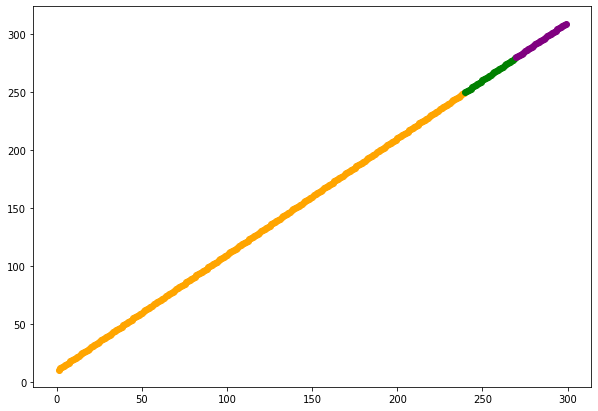

In [88]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train,y_train,c='orange', label='Train')
plt.scatter(X_val,y_val,c='green', label='Validation')
plt.scatter(X_test,y_test,c='purple', label='Test')
plt.legend;


## Separamos datos de forma random

El metodo de separacion de datos en entrenamiento, test y validacion con sklearn no es posible. Solo permite separar en entrenamiento y test.

In [89]:
from sklearn.model_selection import train_test_split 
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)  #random_state sirve para repetir los mismo valores cada vez que se ejecuta la celda
print(f"Xtrain length: {len(Xtrain)}, ytrain length: {len(ytrain)}")
print(f"Xtest length: {len(Xtest)}, ytest length: {len(ytest)}")

Xtrain length: 239, ytrain length: 239
Xtest length: 60, ytest length: 60


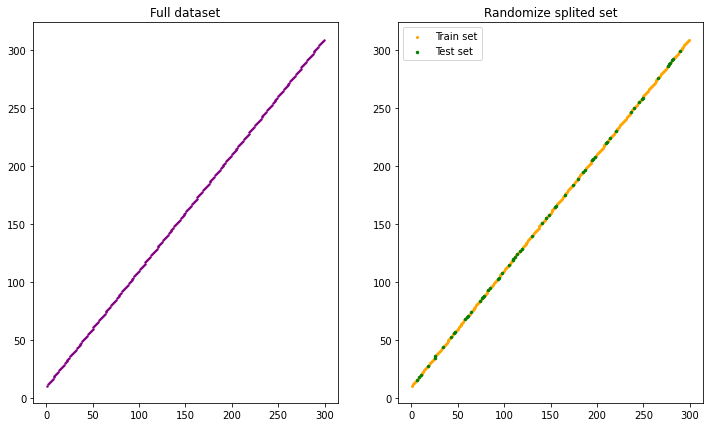

In [90]:
#Visualizamos los datos de entrenamiento y testeo
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.scatter(x,y,c='purple',s=2)
plt.title("Full dataset")
plt.subplot(1,2,2)
plt.scatter(Xtrain,ytrain,c='orange',s=4,label='Train set')
plt.scatter(Xtest,ytest,c='green',s=6,label='Test set')
plt.title("Randomize splited set")
plt.legend();

## Armamos nuestro modelo de regresion lineal simple. 

Vamos a implementar la regresion de OLS (minimos cuadrados ordinarios).

Esto lo vamos a hacer con sklearn.

Para entrenar el modelo usamos el metodo .fit()

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
linear_model = LinearRegression()

In [91]:
X_train.reshape(-1, 1).shape
y_train.reshape(-1, 1).shape

(239, 1)

In [92]:
linear_model.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1)) # El formato que requiere el metodo es que x_train = (n°sample, n°features)

LinearRegression()

In [93]:
## Un modelo de regresion busca dos valores, b0 y b1
# Para ver esos valores que aproximo el modelo LinearRegression usamos los atributos .coef_ y .intercept_ 

linear_model.coef_, linear_model.intercept_

(array([[1.]]), array([10.]))

In [108]:
# Predecir usando esos valores de b0 y b1 que el modelo aproximo.

y_pred = linear_model.predict(Xtest.reshape(-1,1))
y_pred.shape

(60, 1)

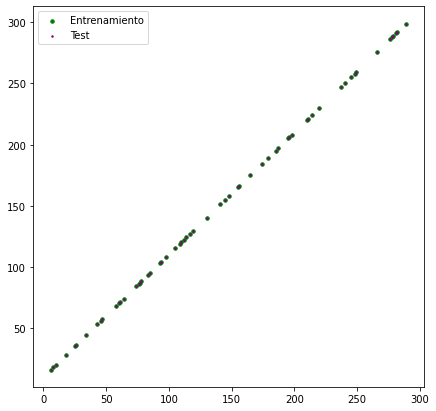

In [109]:
plt.figure(figsize=(7,7))
plt.scatter(Xtest,y_pred.squeeze(),c='green', s=12,label='Entrenamiento')
plt.scatter(Xtest,ytest, c='purple', s=2,label='Test')
plt.legend();